In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.mlab as mlab
np.random.seed(2)

X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1)

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_exact = np.dot(np.linalg.pinv(A), b)


def cost(w):
	return .5/Xbar.shape[0]*np.linalg.norm(y - Xbar.dot(w), 2)**2;

def grad(w):
	return 1/Xbar.shape[0] * Xbar.T.dot(Xbar.dot(w) - y)


def numerical_grad(w, cost):
	eps = 1e-4
	g = np.zeros_like(w)
	for i in range(len(w)):
		w_p = w.copy()
		w_n = w.copy()
		w_p[i] += eps 
		w_n[i] -= eps
		g[i] = (cost(w_p) - cost(w_n))/(2*eps)
	return g 

def check_grad(w, cost, grad):
	w = np.random.rand(w.shape[0], w.shape[1])
	grad1 = grad(w)
	grad2 = numerical_grad(w, cost)
	return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 


print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))


Checking gradient... True


In [74]:
# single point gradient
def sgrad(w, i, rd_id):
    true_i = rd_id[i]
    xi = Xbar[true_i, :]
    yi = y[true_i]
    a = np.dot(xi, w) - yi
    return (xi*a).reshape(2, 1)

def SGD(w_init, grad, eta):
    w = [w_init]
    w_last_check = w_init
    iter_check_w = 10
    N = X.shape[0]
    count = 0
    for it in range(10):
        # shuffle data 
        rd_id = np.random.permutation(N)
        for i in range(N):
            count += 1 
            g = sgrad(w[-1], i, rd_id)
            w_new = w[-1] - eta*g
            w.append(w_new)
            if count%iter_check_w == 0:
                w_this_check = w_new                 
                if np.linalg.norm(w_this_check - w_last_check)/len(w_init) < 1e-3:                                    
                    return w
                w_last_check = w_this_check
    return w

w_init = np.array([[2], [1]])
w = SGD(w_init, grad, .1)

print(len(w), w[-1])

2911 [[ 4.05246225]
 [ 3.00796823]]


LR Momentum with contours

In [48]:
N = X.shape[0]
a1 = np.linalg.norm(y, 2)**2/N
b1 = 2*np.sum(X)/N
c1 = np.linalg.norm(X, 2)**2/N
d1 = -2*np.sum(y)/N 
e1 = -2*X.T.dot(y)/N

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
xg = np.arange(1.5, 7.0, delta)
yg = np.arange(0.5, 4.5, delta)
Xg, Yg = np.meshgrid(xg, yg)
Z = a1 + Xg**2 +b1*Xg*Yg + c1*Yg**2 + d1*Xg + e1*Yg

In [76]:
print(len(w))

2911


In [93]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def save_gif3(eta):
#     (w, it) = GD_momentum(w_init, grad, eta, gamma)
    batch_it = 20
#     w = SGD(w_init, grad, eta)
    it = len(w)
    fig, ax = plt.subplots(figsize=(4,4))    
    plt.cla()
    plt.axis([1.5, 7, 0.5, 4.5])
#     x0 = np.linspace(0, 1, 2, endpoint=True)
    
    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(Xg, Yg, Z, 100)
            manual_locations = [(4.5, 3.5), (4.2, 3), (4.3, 3.3)]
            animlist = plt.clabel(CS, inline=.1, 
                                  fontsize=10, manual=manual_locations)
#             animlist = plt.title('labels at selected locations')
            plt.plot(w_exact[0], w_exact[1], 'go')
        else:
            animlist = plt.plot([w[(ii-1)*batch_it][0], w[ii*batch_it][0]], 
                                [w[(ii-1)*batch_it][1], w[ii*batch_it][1]], 'r-')
        animlist = plt.plot(w[ii*batch_it][0], w[ii*batch_it][1], 'ro', markersize = 4) 
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii*batch_it, it)
        xlabel += '; ||grad||_2 = %.3f' % np.linalg.norm(grad(w[ii*batch_it]))
        ax.set_xlabel(xlabel)
        animlist = plt.title('LR with SGD')
        return animlist, ax
       
    anim1 = FuncAnimation(fig, update, 
                          frames=np.arange(0, it//batch_it), interval=100)
#     fn = 'img2_' + str(eta) + '.gif'
    fn = 'LR_SGD_contours.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')

eta = .1 

save_gif3(eta)
# save_gif2(.1)
# save_gif2(2)

In [85]:
# loss function 
print(cost(w[-1]))
loss = np.zeros((len(w), 1))
for i in range(len(w)):
    loss[i] = cost(w[i])
print(loss)

0.0206039739791
[[ 4.59755191]
 [ 3.56500074]
 [ 2.93772353]
 ..., 
 [ 0.02282538]
 [ 0.02423515]
 [ 0.02060397]]


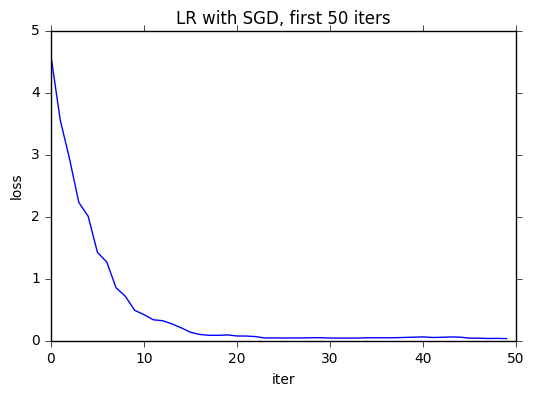

In [92]:
plt.plot(range(50), loss[:50], 'b')
plt.xlabel('iter')
plt.ylabel('loss')
plt.title('LR with SGD, first 50 iters')
plt.show()